#Credit Score Classification








Connecting Google Colab to Kaggle to get Dataset directly to colab

In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle_datasets/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d clkmuhammed/creditscoreclassification

Downloading the helper functions designed by mrdbourke which contains custom functions

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

Installing required libraries for EDA process

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!pip install klib

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Importing required functions from helper functions

In [ ]:
from helper_functions import unzip_data, plot_loss_curves, make_confusion_matrix, accuracy_score, calculate_results

unziping the dataset

In [ ]:
unzip_data("creditscoreclassification.zip")

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import klib
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

Importing the datasets


> About Dataset

There are 2 datasets, one with dependent variable i.e credit score which i will denote it as training set and other without dependent variable which i will denote test set where i will use it predict the credit score of customers which will be unseen to the model we are gonna build.



In [ ]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [ ]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


#Part 1 : Exploratory Data Analysis

In this process , we will try to know our visually for which im going to use 2 libraries to automate EDA process for us.


*   KLib
*   Pandas Profiling




Checking if there are any missing, duplicates rows or columns

In [ ]:
df_train = klib.data_cleaning(df1)
df_test = klib.data_cleaning(df2)

Shape of cleaned data: (100000, 28) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 11.63 MB (-54.45%)

Shape of cleaned data: (50000, 27) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 5.48 MB (-53.2%)



In [ ]:
profile = ProfileReport(df_train,explorative=True, title="EDA Report")
profile.to_notebook_iframe()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   id                        100000 non-null  int32   
 1   customer_id               100000 non-null  int32   
 2   month                     100000 non-null  int8    
 3   name                      100000 non-null  string  
 4   age                       100000 non-null  float32 
 5   ssn                       100000 non-null  float32 
 6   occupation                100000 non-null  category
 7   annual_income             100000 non-null  float32 
 8   monthly_inhand_salary     100000 non-null  float32 
 9   num_bank_accounts         100000 non-null  float32 
 10  num_credit_card           100000 non-null  float32 
 11  interest_rate             100000 non-null  float32 
 12  num_of_loan               100000 non-null  float32 
 13  type_of_loan              1000

#Part 2 : Data Preprocessing

Dealing with categorical variables where we are going to convert them to dummy variables. we are going to use two techniques :



*   Label encoding
*   One hot Encoding



In [ ]:
df_train['credit_mix'].unique()

['Good', 'Standard', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']

In [ ]:
df_train['payment_behaviour'].unique()

['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
                         'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
                         'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']

In [ ]:
df_train['credit_score'].unique()

['Good', 'Standard', 'Poor']
Categories (3, object): ['Good', 'Poor', 'Standard']

In [ ]:
df_train['occupation'].unique()

['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', ..., 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']
Length: 15
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician',
                          'Scientist', 'Teacher', 'Writer']

In [ ]:
df_train['payment_of_min_amount'].unique()

['No', 'NM', 'Yes']
Categories (3, object): ['NM', 'No', 'Yes']

Label encoding for dependent variable i.e Credit Score

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['credit_score'] = le.fit_transform(df_train['credit_score'])


In [ ]:
df_train['credit_score'].unique()

array([0, 2, 1])

One hot encoding for other categorical variables

In [ ]:
df_train = pd.get_dummies(df_train, columns=['credit_mix','payment_behaviour','occupation','payment_of_min_amount'])
df_test = pd.get_dummies(df_test, columns=['credit_mix','payment_behaviour','occupation','payment_of_min_amount'])

Dropping few columns which are least import for model building

In [ ]:
df_test = df_test.drop(['id','customer_id','name','ssn','type_of_loan'], axis = 1)

Overview of final dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   id                                                  100000 non-null  int32  
 1   customer_id                                         100000 non-null  int32  
 2   month                                               100000 non-null  int8   
 3   name                                                100000 non-null  string 
 4   age                                                 100000 non-null  float32
 5   ssn                                                 100000 non-null  float32
 6   annual_income                                       100000 non-null  float32
 7   monthly_inhand_salary                               100000 non-null  float32
 8   num_bank_accounts                                   100000 non-nu

Creating dependent and independent variables

In [ ]:
X = df_train.drop(['id','customer_id','name','ssn','type_of_loan','credit_score'], axis = 1)
y = df_train['credit_score']

Spliting the data into training and validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:, :'monthly_balance'] = sc.fit_transform(X_train.loc[:, :'monthly_balance'])
X_test.loc[:, :'monthly_balance'] = sc.transform(X_test.loc[:, :'monthly_balance'])
df_test.loc[:, :'monthly_balance'] = sc.transform(df_test.loc[:, :'monthly_balance'])

#Part 3 : Model Building



> List of the models which I'm going used :





*   XGBoost
*   Logistic Regression
* Deep Neural Network
* Random Forest Classification




XGBoost

In [ ]:
from xgboost import XGBClassifier
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

Testing the Model on Test Set

In [ ]:
y_pred = model_1.predict(X_test)

Evaluating the Model

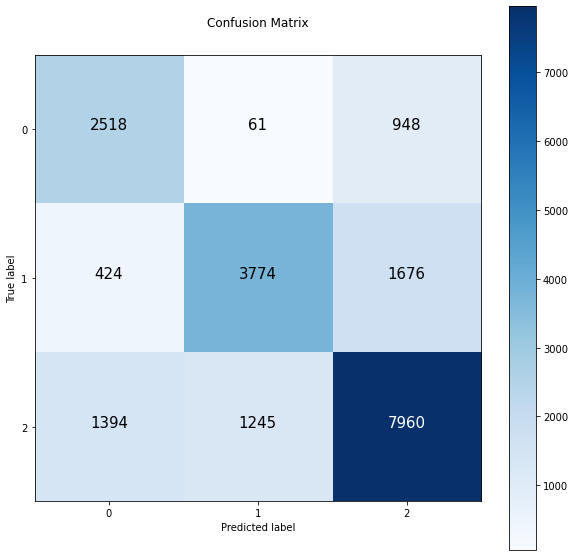

In [ ]:
make_confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.7126

In [ ]:
Xgboost = calculate_results(y_test, y_pred)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model_2.predict(X_test)

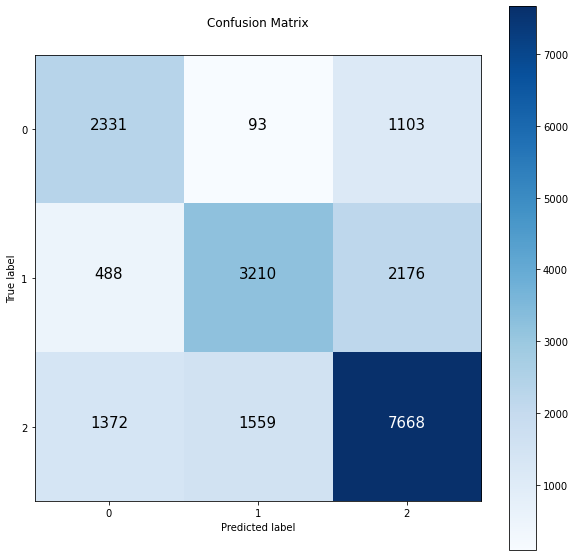

In [ ]:
make_confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.66045

In [ ]:
logistic = calculate_results(y_test, y_pred)

Deep Neural Network (DNN)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3, activation = 'softmax')

])

model_3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model_3.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10
2500/2500 [==============================] - 11s 3ms/step - loss: 0.7245 - accuracy: 0.6723 - val_loss: 0.6758 - val_accuracy: 0.6811
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6715 - accuracy: 0.6938 - val_loss: 0.6858 - val_accuracy: 0.6877
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6588 - accuracy: 0.7007 - val_loss: 0.6560 - val_accuracy: 0.6990
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6495 - accuracy: 0.7032 - val_loss: 0.6437 - val_accuracy: 0.7056
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6410 - accuracy: 0.7089 - val_loss: 0.6354 - val_accuracy: 0.7133
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6296 - accuracy: 0.7138 - val_loss: 0.6343 - val_accuracy: 0.7088
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6193 - accuracy: 0.7174 - val_loss: 0.6289 - val_accurac

Ploting loss and accuracy curves to check model performance

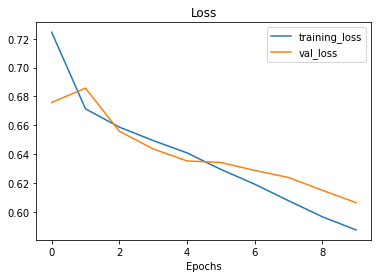

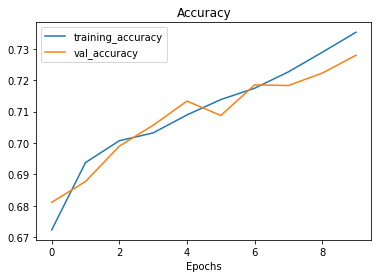

In [ ]:
plot_loss_curves(history)

In [ ]:
y_prob = model_3.predict(X_test)
y_pred = tf.argmax(y_prob, axis = 1)

625/625 [==============================] - 1s 2ms/step


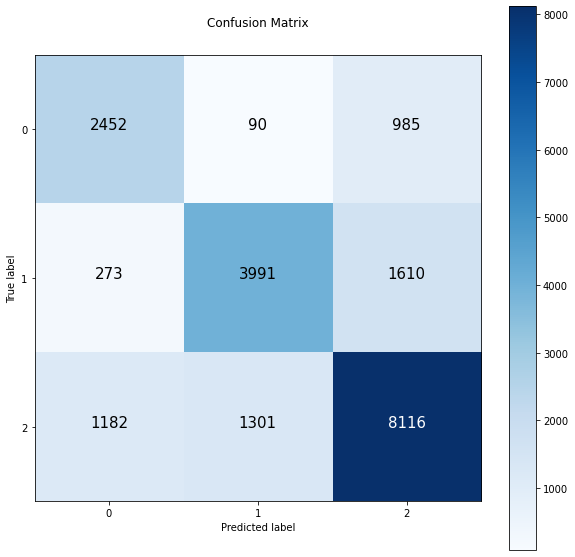

In [ ]:
make_confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.72795

In [ ]:
dnn = calculate_results(y_test, y_pred)

Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state = 42)
model_4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [ ]:
y_pred = model_4.predict(X_test)

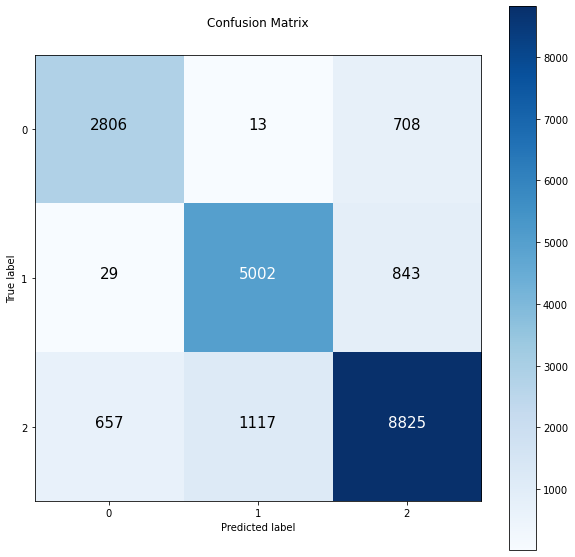

In [ ]:
make_confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.83165

In [ ]:
random_forest = calculate_results(y_test, y_pred)

Creating a dataframe to check which model have performed better

In [ ]:
model_perf = pd.DataFrame({"XGBoost":Xgboost,"Logistic Regression":logistic,"Deep Neural Network":dnn, "Random Forest":random_forest})

In [ ]:
model_perf = model_perf.transpose()

In [ ]:
model_perf.sort_values(by=['accuracy'],ascending=False)

,accuracy,precision,recall,f1
Random Forest,83.165,0.832017,0.83165,0.831666
Deep Neural Network,72.795,0.730025,0.72795,0.728273
XGBoost,71.260,0.719168,0.71260,0.713606
Logistic Regression,66.045,0.663204,0.66045,0.659360


#Make actual predictions on unseen test data

* Well It's seems like Random Forest is a clean winner. So, this model will be our best performing model so far.
* Now its time to test this high performing model into action where we are going test this model on our unseen test data and predicted credit score and add to our df2 data frame.

Model_4 : Random forest

In [ ]:
y_pred = model_4.predict(df_test)

Performing inverse transformation dependent variable i.e Credit Score from numeric class to string class i.e good,bad, standard

In [ ]:
y_pred_1 = le.inverse_transform(y_pred)

Creating a dataframe which we gonna merge with df2

In [ ]:
prediction = pd.DataFrame(y_pred_1, columns = ['Credit score (Predicted)'])

In [ ]:
prediction

,Credit score (Predicted)
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
49995,Standard
49996,Poor
49997,Poor
49998,Poor


Merging two dataframe

In [ ]:
results = df2.join(prediction)

This our final output where we can submit this data to our team for further analysis.

In [ ]:
results.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit score (Predicted)
0,5642,3392,9,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,35.030402,273.0,No,49.574949,21.465380,Low_spent_Small_value_payments,186.266702,Good
1,5643,3392,10,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,Good
2,5644,3392,11,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,33.811894,275.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,264.675446,Good
3,5645,3392,12,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,32.430559,276.0,No,49.574949,21.465380,High_spent_Medium_value_payments,343.826873,Good
4,5654,8625,9,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,Good
5,5655,8625,10,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,30.116600,328.0,No,18.816215,39.684018,Low_spent_Large_value_payments,303.355083,Good
6,5656,8625,11,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,30.996424,329.0,No,18.816215,39.684018,High_spent_Large_value_payments,452.302307,Good
7,5657,8625,12,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,33.875167,330.0,No,18.816215,39.684018,High_spent_Large_value_payments,421.447964,Good
8,5666,11708,9,Langep,35.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,Good,1303.01,35.229707,221.0,No,246.992319,168.413703,Low_spent_Medium_value_payments,854.226027,Standard
9,5667,11708,10,Langep,35.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,Good,1303.01,35.685836,222.0,No,246.992319,168.413703,Low_spent_Large_value_payments,788.114550,Good
